# Plot scan

In [56]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np
from itertools import product
import sys
sys.path.append('../plotting')
from nloGluinoXsec import xsecF
import seaborn as sns
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu_r']

### Load ATLAS Curve

In [57]:
atlasCurve = np.genfromtxt('../../ATLAS_data/HEPData-ins2080541-v1-csv/MassLimitvs.Lifetime,R-hadron,compressed,Observed.csv',skip_header=9,delimiter=',')

### Load Recast Data

In [58]:
recastData = pd.read_pickle('./gluinoRecast.pcl')
recastData = recastData.round({'tau_ns' : 2, 'mLLP' : 2})
# Remove stable points:
recastData = recastData[recastData['tau_ns'] < 1000.0]

### Get all model points

In [59]:
pts = list(set((zip(recastData['tau_ns'],recastData['mLLP']))))
robs = []
kfactors = []
# Select max r_obs for each point
for tau,mLLP in pts:
    restData = recastData[(recastData['mLLP'] == mLLP) & (recastData['tau_ns'] == tau)]
    robs.append(restData['robs'].max())
#     kfactors.append(atlasDataR['Signal Cross-Section (pb)'].iloc[0]/restData['Total xsec (pb)'].iloc[0])
robs = np.array(robs)
pts = np.array(pts)

### Get K-factors

In [60]:
recastData['kfactor'] = recastData['mLLP'].apply(xsecF)/recastData['Total xsec (pb)']
robs = recastData['kfactor'].to_numpy()*robs
recastData['robs_NLO'] = robs

### Interpolate for a denser grid

In [61]:
newPts = np.array(list(product(np.linspace(np.log10(pts[:,0].min()), np.log10(pts[:,0].max()),500),
                                      np.linspace(pts[:,1].min(),pts[:,1].max(),500))))
muPts = griddata(list(zip(np.log10(pts[:,0]),pts[:,1])),robs,newPts)
newPts = newPts[~np.isnan(muPts)]
muPts = muPts[~np.isnan(muPts)]

In [62]:
newPts[:,0] = 10**newPts[:,0]

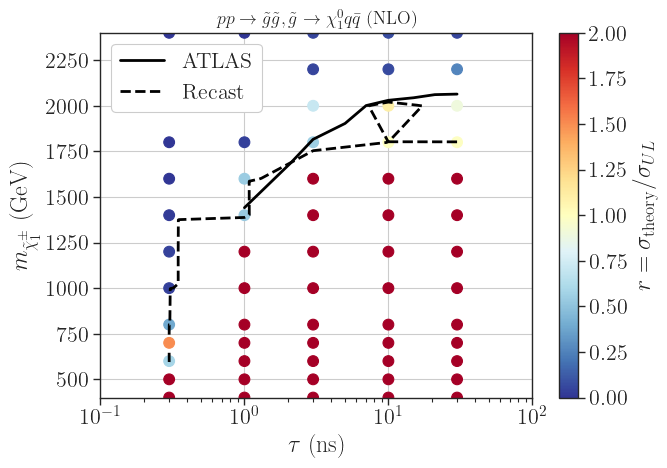

In [63]:
fig = plt.figure(figsize=(7,5))
plt.scatter(x=pts[:,0],y=pts[:,1],vmin=0.0,vmax=2.0,
            c=robs,cmap=cm,s=60)
cbar = plt.colorbar(label=r'$r = \sigma_{\rm theory}/\sigma_{UL}$')

plt.plot(atlasCurve[:,0],atlasCurve[:,1],
                 label='ATLAS',linewidth=2,color='black')
# plt.fill_between(atlasCurve[:,0],atlasCurve[:,1]+atlasCurve[:,2],atlasCurve[:,1]+atlasCurve[:,3],
                #  label='ATLAS',alpha=0.5)

plt.tricontour(newPts[:,0],newPts[:,1],muPts,levels=[1.0],
               linewidths=2,linestyles='dashed',colors='black')
plt.plot([],[],label='Recast',linewidth=2.0,linestyle='dashed',color='black')
plt.ylabel(r'$m_{\tilde\chi_1^\pm}$ (GeV)')
plt.xlabel(r'$\tau$ (ns)')
# plt.ylim(500,1200)
plt.xlim(0.1,100)
# plt.yticks(np.arange(500.,1200.,100.))
# plt.grid()
plt.xscale('log')
plt.title(r'$p p \to \tilde g \tilde g, \tilde g \to \chi_1^0 q \bar{q} $ (NLO)',fontsize=13)
plt.legend(framealpha=1.0,loc='upper left')
plt.tight_layout()
plt.grid()
plt.savefig('gluino_fig16b.png')
plt.show()

In [64]:
rSel = recastData[(recastData['tau_ns'] == 3.0) & (recastData['mLLP'] > 1250.0)]
rSel['$\sigma_{Ns}$']/rSel['$N_s$']

75     0.027163
85     0.025311
95     0.024066
105    0.023507
115    0.022688
125    0.023969
dtype: float64

In [65]:
rSel.T

,75,85,95,105,115,125
mLLP,1400.0,1600.0,1800.0,2000.0,2200.0,2400.0
mLSP,1370.0,1570.0,1770.0,1970.0,2170.0,2370.0
tau_ns,3.0,3.0,3.0,3.0,3.0,3.0
Luminosity (1/fb),139.0,139.0,139.0,139.0,139.0,139.0
Regime,Long Lifetime,Long Lifetime,Long Lifetime,Long Lifetime,Long Lifetime,Long Lifetime
SR,SR-Inclusive_High,SR-Inclusive_High,SR-Inclusive_High,SR-Inclusive_High,SR-Inclusive_High,SR-Inclusive_High
Target Mass [GeV],1400.0,1600.0,1800.0,2000.0,2200.0,2400.0
$N_s$,149.504815,41.856718,12.076542,3.457211,1.039665,0.27127
$\sigma_{Ns}$,4.060954,1.059425,0.290637,0.08127,0.023588,0.006502
width,0.0,0.0,0.0,0.0,0.0,0.0
